# Employee Attrition Dashboard

In [3]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the zip file path
zip_file_path = 'Employee Attrition for Healthcare.zip'

# Step 1: Extract the dataset from zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files in the zip
    extracted_files = zip_ref.namelist()  # List of extracted files

# Load the CSV data into pandas DataFrames
employee_data = pd.read_csv('watson_healthcare_modified.csv')
shap_values = pd.read_csv('watson_shap_values_for_testset.csv')

# Optionally, load the PDF report if needed for context
# You can use PyMuPDF or another library to read PDF files if necessary

print(employee_data.head())
print(shap_values.head())


   EmployeeID  Age Attrition     BusinessTravel  DailyRate  Department  \
0     1313919   41        No      Travel_Rarely       1102  Cardiology   
1     1200302   49        No  Travel_Frequently        279   Maternity   
2     1060315   37       Yes      Travel_Rarely       1373   Maternity   
3     1272912   33        No  Travel_Frequently       1392   Maternity   
4     1414939   27        No      Travel_Rarely        591   Maternity   

   DistanceFromHome  Education EducationField  EmployeeCount  ...  \
0                 1          2  Life Sciences              1  ...   
1                 8          1  Life Sciences              1  ...   
2                 2          2          Other              1  ...   
3                 3          4  Life Sciences              1  ...   
4                 2          1        Medical              1  ...   

   RelationshipSatisfaction StandardHours  Shift  TotalWorkingYears  \
0                         1            80      0                  8  

In [ ]:
# Data Exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

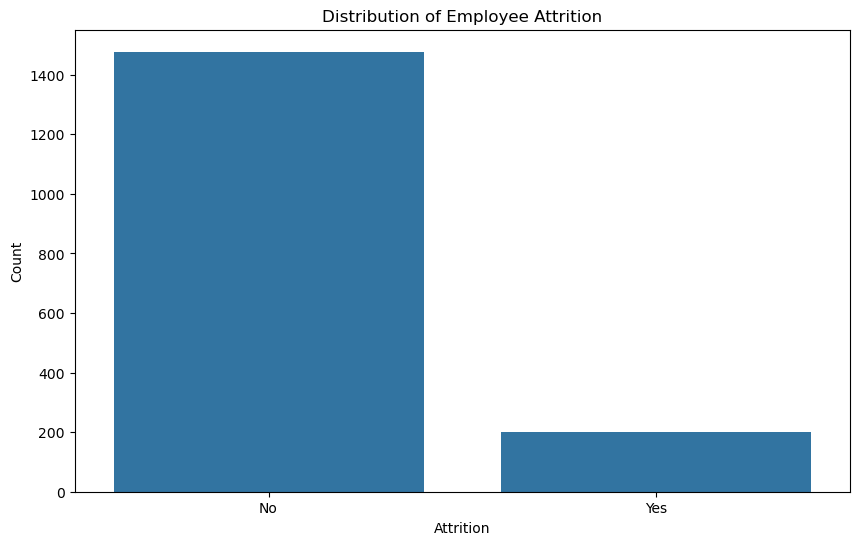

In [4]:
# Basic data exploration
print(employee_data.info())
print(employee_data.describe())
print(shap_values.info())
print(shap_values.describe())

# Check for missing values
missing_values = employee_data.isnull().sum()
print("Missing Values in Employee Data:\n", missing_values)

# Visualizing the distribution of attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=employee_data, x='Attrition')  # Assuming 'Attrition' is the target column
plt.title('Distribution of Employee Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


In [ ]:
# Data Preprocessing

In [5]:
# Example preprocessing steps

# 1. Check and handle missing values
# Since there are no missing values, we can skip this step.
# If there were missing values, you might want to handle them as follows:
# employee_data.fillna(method='ffill', inplace=True)  # Forward fill for simplicity

# 2. Encode categorical variables
# Convert categorical variables into dummy/indicator variables
# Identify categorical columns
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                       'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Shift']

# Use one-hot encoding for categorical variables
employee_data_encoded = pd.get_dummies(employee_data, columns=categorical_columns, drop_first=True)

# 3. Additional transformations (if needed)
# For example, you might want to normalize or standardize numerical features
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
                      'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
                      'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                      'NumCompaniesWorked', 'PercentSalaryHike', 
                      'PerformanceRating', 'RelationshipSatisfaction', 
                      'StandardHours', 'TotalWorkingYears', 
                      'TrainingTimesLastYear', 'WorkLifeBalance', 
                      'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
employee_data_encoded[numerical_features] = scaler.fit_transform(employee_data_encoded[numerical_features])

# 4. Save preprocessed data for use in Tableau or Power BI
employee_data_encoded.to_csv('preprocessed_employee_data.csv', index=False)

print("Data preprocessing complete. Preprocessed data saved as 'preprocessed_employee_data.csv'.")


Data preprocessing complete. Preprocessed data saved as 'preprocessed_employee_data.csv'.


In [ ]:
# Dashboard Creation

# After preprocessing, you can import your cleaned data into Tableau or Power BI. The process for each tool will vary:

# In Tableau:
# Open Tableau and connect to your preprocessed_employee_data.csv file.
# Drag and drop fields to create visualizations (e.g., bar charts, line graphs).
# Create dashboards by combining these visualizations.

# In Power BI:
# Open Power BI and load your preprocessed_employee_data.csv file.
# Use the Fields pane to create visualizations by dragging fields into the report view.
# Use the dashboard feature to arrange your visuals.

# Documentation and Sharing

# Once your dashboard is complete:
# Take screenshots or record a demo of your dashboard.
# Write a README file for your GitHub repository detailing the project, objectives, and how to navigate the dashboard.
# Share your work on LinkedIn, highlighting your skills in data visualization and employee attrition analysis in the healthcare sector.